In [8]:
import pandas as pd
df = pd.read_excel(r'C:\Users\pavan\Desktop\3 IISc AUG 2023\DeM\assignment1 data_763216225.xlsx')
df = df.rename(columns={'Inter-arrival times of passengers towards Bangalore City': 'BNG',
                        'Inter-arrival times of passengers towards Tumkur': 'TMK'})
df.head()


BNG       TMK
0  0.000448  0.203357
1  0.012459  0.193677
2  0.108506  0.325372
3  0.245653  0.283016
4  0.000174  0.430408

sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm            2.640840  595.458074  615.009653     inf      0.077757   
exponweib          5.032193  636.106800  662.175573     inf      0.030879   
genextreme         5.373095  600.681940  620.233519     inf      0.081537   
chi2              12.174192  860.437405  879.988985     inf      0.007481   
beta              12.544854  845.504460  871.573233     inf      0.008642   

               ks_pvalue  
lognorm     9.693685e-27  
exponweib   1.413400e-04  
genextreme  2.304376e-29  
chi2        9.403002e-01  
beta        8.460369e-01

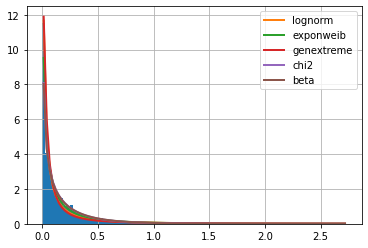

In [37]:
from fitter import Fitter, get_common_distributions

#Get Data - from question
data = df['BNG']


# fitter
distributions_set = get_common_distributions()
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min', 
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'beta'])  

f = Fitter(df['BNG'], distributions = distributions_set) 
f.fit()
f.summary()

In [77]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','arcsine', 'cosine',  'weibull_max', 
                          'dweibull', 't', 'pareto', 'exponnorm',
                          "exponweib", "pareto", "genextreme"]

#Read your data and set y_std to the column that you want to fit.
y_std=df['BNG']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)


Distributions listed by goodness of fit:
............................................
   Distribution    chi_square
3          beta      3.460008
18    exponweib    132.989032
9      pearson3    162.004031
8       lognorm    535.823810
0   weibull_min    770.151773
20   genextreme    901.325759
4      invgauss    914.462726
19       pareto   1355.359856
16       pareto   1355.359856
6         gamma   2031.875462
7         expon   3501.309900
17    exponnorm   3505.418129
15            t   6985.768292
14     dweibull   7508.119993
2   weibull_max   9897.615672
13  weibull_max   9897.615672
1          norm  18455.681458
11      arcsine  25679.763150
10       triang  29688.702601
12       cosine  35499.065261
5       uniform  36259.638804


In [72]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'beta','expon','gamma','erlang','lognorm']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(df['BNG'])


p value for norm = 1.7346441185665096e-260
p value for exponweib = 0.00014133997313178946
p value for weibull_max = 3.4748961696289526e-97
p value for weibull_min = 2.7229728777875165e-32
p value for pareto = 1.341475880749748e-41
p value for genextreme = 2.3043763819036534e-29
p value for beta = 0.8460368729615085
p value for expon = 2.299333942971718e-119
p value for gamma = 3.338005372792984e-174
p value for erlang = 4.330847108018104e-177
p value for lognorm = 9.693684741396191e-27
Best fitting distribution: beta
Best p value: 0.8460368729615085
Parameters for the best fit: (0.49965216267706714, 146.2302223467192, 7.527929999999999e-08, 48.63634769205542)


('beta',
 0.8460368729615085,
 (0.49965216267706714,
  146.2302223467192,
  7.527929999999999e-08,
  48.63634769205542))

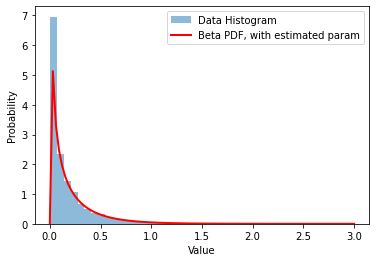

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution
a = 0.49965216267706714  # First shape parameter
b = 146.2302223467192    # Second shape parameter
loc = 7.527929999999999e-08  # Location parameter
scale = 48.63634769205542     # Scale parameter

# Number of random samples to generate
data=df['BNG']
plt.hist(data, bins=40, density=True, alpha=0.5, label='Data Histogram')

num_samples = 5000
samples = beta.rvs(a, b, loc=loc, scale=scale, size=num_samples)
x = np.linspace(0, 3, 100) 
pdf = beta.pdf(x, a, b, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Beta PDF, with estimated param')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

# Show the plot
plt.show()


sumsquare_error        aic        bic  kl_div  ks_statistic  \
weibull_min         9.034579  15.722703  35.274283     inf      0.009323   
exponweib           9.062319  16.193580  42.262352     inf      0.010400   
exponnorm          11.141022   3.958895  23.510475     inf      0.021978   
norm               11.141144   1.978178  15.012564     inf      0.021969   
t                  11.141651   3.968649  23.520229     inf      0.021980   

             ks_pvalue  
weibull_min   0.773839  
exponweib     0.647869  
exponnorm     0.015732  
norm          0.015794  
t             0.015716

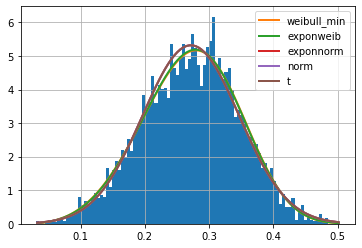

In [35]:
from fitter import Fitter, get_common_distributions

#Get Data - from question
data = df['TMK']


# fitter
distributions_set = get_common_distributions()
distributions_set.extend(['arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min', 
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"])  

f = Fitter(df['TMK'], distributions = distributions_set) 
f.fit()
f.summary()

In [51]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','arcsine', 'cosine',  'weibull_max', 
                          'dweibull', 't', 'pareto', 'exponnorm',
                          "exponweib", "pareto", "genextreme"]

#Read your data and set y_std to the column that you want to fit.
y_std=df['TMK']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)


Distributions listed by goodness of fit:
............................................
   Distribution    chi_square
18    exponweib      2.135308
0   weibull_min      2.195267
3          beta      3.903244
9      pearson3      9.783328
2   weibull_max     15.220816
13  weibull_max     15.220816
20   genextreme     15.239770
17    exponnorm     18.089515
15            t     18.101596
1          norm     18.106633
8       lognorm     20.828860
6         gamma     25.481042
14     dweibull     69.401174
4      invgauss    112.061249
10       triang   1162.254808
5       uniform   8935.350861
11      arcsine  16481.773344
19       pareto  26543.154534
16       pareto  26543.154534
7         expon  26599.951790
12       cosine  50000.000000


In [45]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'beta','expon','gamma','erlang']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(df['TMK'])


p value for norm = 0.01579406964559145
p value for exponweib = 0.6478694181391387
p value for weibull_max = 0.10005017704472685
p value for weibull_min = 0.7738385664078224
p value for pareto = 0.0
p value for genextreme = 0.09928554626237263
p value for beta = 0.37193627677031393
p value for expon = 0.0
p value for gamma = 0.003598810439952921
p value for erlang = 0.002316703980285014
Best fitting distribution: weibull_min
Best p value: 0.7738385664078224
Parameters for the best fit: (4.109126365397216, -0.002781044914135479, 0.3021954711623629)


('weibull_min',
 0.7738385664078224,
 (4.109126365397216, -0.002781044914135479, 0.3021954711623629))

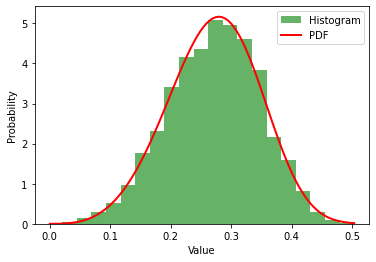

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parameters for the Weibull distribution

c = 4.109126365397216  # Shape parameter
loc = -0.002781044914135479  # Location parameter
scale = 0.3021954711623629  # Scale parameter

# Number of random samples to generate
num_samples = 5000

# Generate random samples from the Weibull distribution
samples = weibull_min.rvs(c, loc=loc, scale=scale, size=num_samples)

# Create a histogram
plt.hist(samples, bins=20, density=True, alpha=0.6, color='g', label='Histogram')

# Plot the probability density function (PDF) of the Weibull distribution for comparison
x = np.linspace(0, max(samples), 100)
pdf = weibull_min.pdf(x, c, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

# Show the plot
plt.show()


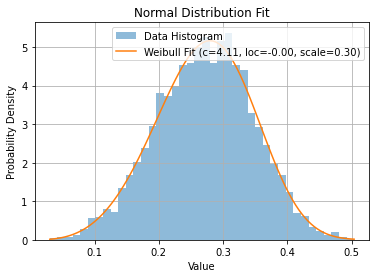

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = df['TMK']

c = 4.109126365397216  # Shape parameter
loc = -0.002781044914135479  # Location parameter
scale = 0.3021954711623629  # Scale parameter

x = np.linspace(min(data), max(data), 100)
pdf_weibull = weibull_min.pdf(x, c, loc=loc, scale=scale)

plt.hist(data, bins=40, density=True, alpha=0.5, label='Data Histogram')
plt.plot(x, pdf_weibull, label=f'Weibull Fit (c={c:.2f}, loc={loc:.2f}, scale={scale:.2f})')

plt.title('Normal Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
pip install simpy


In [5]:
import simpy
import random
import statistics
import numpy as np


In [4]:
#storing the passenger details as well.
# From here on city A means Bengaluru, city B means Tumkur

## Ticket Issue

In [151]:
import simpy
import random
import numpy as np
from scipy.stats import beta, weibull_min

simulation_duration = 1440   # 24 hrs

# Parameters for passenger arrivals in City A (Beta distribution)
a_city_a = 0.49965216267706714
b_city_a = 146.2302223467192
loc_city_a = 7.527929999999999e-08
scale_city_a = 48.63634769205542

# Parameters for passenger arrivals in City B (Weibull_min distribution)
c_city_b = 4.109126365397216
loc_city_b = -0.002781044914135479
scale_city_b = 0.3021954711623629

NUM_MACHINES = 40
NUM_HUMANS = 1
MACHINE_FAILURE_MEAN = 1000  # Mean time between machine failures in minutes
MACHINE_FAILURE_STD = 200    # Standard deviation of time between machine failures in minutes
MACHINE_REPAIR_RATE = 1 / 30  # Repair rate for machines (average repair time of 30 minutes)

# Create a SimPy environment
env = simpy.Environment()

# Create resources for machines and humans
machines = [simpy.PreemptiveResource(env, capacity=1) for _ in range(NUM_MACHINES)]
humans = simpy.Resource(env, capacity=NUM_HUMANS)

city_a_passengers = []
city_b_passengers = []

# Function to simulate machine failures and repairs
def machine_failure(env, machine, machine_id, interruptions):
    while True:
        yield env.timeout(max(0, random.normalvariate(MACHINE_FAILURE_MEAN, MACHINE_FAILURE_STD)))
        print(f"Machine {machine_id} failed at {env.now}")

        # Only interrupt passengers who are waiting for the failed machine
        passengers_in_queue = list(machine.queue)
        for passenger in passengers_in_queue:
            # Get the process that is currently waiting for the failed machine
            passenger_process = env.active_process

            # Check if the passenger process is the same as the current process
            if passenger_process is not env.active_process:
                # Interrupt the passenger process
                passenger_process.interrupt()

        with machines[machine_id].request() as request:
            print(f"Passengers at Machine {machine_id} are temporarily affected.")
            yield request

            # Trigger interruption for this machine
            interruptions[machine_id].succeed()

            # Wait for the machine to be repaired
            yield env.timeout(random.expovariate(MACHINE_REPAIR_RATE))

            # Reset the interruption event
            interruptions[machine_id] = simpy.Event(env)

        print(f"Machine {machine_id} repaired at {env.now}")

# Function to simulate passenger arrivals to City A from a Beta distribution
def passenger_arrival_A(env, simulation_duration, interruptions):
    i = 0
    while env.now < simulation_duration:
        interarrival_time_city_a = beta.rvs(a_city_a, b_city_a, loc=loc_city_a, scale=scale_city_a)
        city = "City A"
        yield env.timeout(interarrival_time_city_a)
        env.process(purchase_ticket(env, f'Passenger_A%02d' % i, city, interruptions))
        i += 1

# Function to simulate passenger arrivals to City B from a Weibull_min distribution
def passenger_arrival_B(env, simulation_duration, interruptions):
    j = 0
    while env.now < simulation_duration:
        interarrival_time_city_b = max(0, weibull_min.rvs(c_city_b, loc=loc_city_b, scale=scale_city_b))
        city = "City B"
        yield env.timeout(interarrival_time_city_b)
        env.process(purchase_ticket(env, f'Passenger_B%02d' % j, city, interruptions))
        j += 1

# Create a list to store waiting times of customers
waiting_times = []

# Function to simulate purchasing a ticket
def purchase_ticket(env, passenger_id, city, interruptions):
    arrival_time = env.now
    print(f"Passenger {passenger_id} arrives at station for {city} at {arrival_time}")

    # Log the number of passengers waiting for each machine
    num_passengers_at_machines = [len(machine.queue) for machine in machines]
    num_passengers_in_humans_queue = len(humans.queue)
    print(f"Number of passengers waiting for each machine and Clerk at {arrival_time}: {num_passengers_at_machines,num_passengers_in_humans_queue}")
    # Determine to go for machine or Clerk

    if min(num_passengers_at_machines) <= num_passengers_in_humans_queue:
        machine_id = num_passengers_at_machines.index(min(num_passengers_at_machines))
        passengers_at_machine[machine_id] += 1
        ticket_purchase_time = random.expovariate(0.7)
        with machines[machine_id].request() as request:
            try:
                yield request
                print(f"Passenger {passenger_id} uses Machine {machine_id} to purchase a ticket at {env.now}")
                yield env.timeout(ticket_purchase_time)
                interruptions[machine_id].succeed()  # Trigger interruption for this machine
                yield env.timeout(0)  # Resume immediately after interruption
                interruptions[machine_id] = simpy.Event(env)  # Reset the interruption event
                print(f"Passenger {passenger_id} ticket purchase by Machine {machine_id} completed at {env.now}")
            except simpy.Interrupt:
                print(f"Passenger {passenger_id} ticket purchase interrupted due to Machine {machine_id} failure at {env.now}")
    else:
        ticket_purchase_time = random.expovariate(1)
        with humans.request() as request:
            yield request
            print(f"Passenger {passenger_id} goes to a human to purchase a ticket at {env.now}")
            yield env.timeout(ticket_purchase_time)
            print(f"Passenger {passenger_id} ticket purchase by human completed at {env.now}")

    waiting_time = env.now - arrival_time
    waiting_times.append(waiting_time)
    # Add passenger to the appropriate list based on the city they are traveling to
    if city == "City A":
        city_a_passengers.append({"arrival_time": arrival_time, "ticket_purchase_time": env.now})
    else:
        city_b_passengers.append({"arrival_time": arrival_time, "ticket_purchase_time": env.now})


# Start the simulation
interruptions = {i: simpy.Event(env) for i in range(NUM_MACHINES)}  # Initialize interruption events
for i in range(NUM_MACHINES):
    env.process(machine_failure(env, machines[i], i, interruptions))

passengers_at_machine = [0] * NUM_MACHINES  # Initialize list of passengers waiting for each machine

env.process(passenger_arrival_A(env, simulation_duration,interruptions))
env.process(passenger_arrival_B(env,simulation_duration, interruptions))

env.run(until=simulation_duration)

# Calculate and print statistics on waiting times
average_waiting_time = sum(waiting_times) / len(waiting_times)
print(f"Average Waiting Time: {average_waiting_time} minutes")


waiting_times.sort()

# Find the proportion of people whose waiting time is more than 5 minutes
proportion_above_5_min = sum(1 for time in waiting_times if time > 5) / len(waiting_times)

print('percentage of people with waiting time > 5 min:', proportion_above_5_min*100)


Passenger Passenger_B00 arrives at station for City B at 0.17320604855235328
Number of passengers waiting for each machine and Clerk at 0.17320604855235328: ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B00 uses Machine 0 to purchase a ticket at 0.17320604855235328
Passenger Passenger_A00 arrives at station for City A at 0.17502514373619707
Number of passengers waiting for each machine and Clerk at 0.17502514373619707: ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A01 arrives at station for City A at 0.3557528196404043
Number of passengers waiting for each machine and Clerk at 0.3557528196404043: ([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A01 uses Machine 1 to purchase a ticket at 0.35575

Passenger Passenger_B111 arrives at station for City B at 30.292483295751158
Number of passengers waiting for each machine and Clerk at 30.292483295751158: ([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B110 ticket purchase by Machine 0 completed at 30.322204362190863
Passenger Passenger_B111 uses Machine 0 to purchase a ticket at 30.322204362190863
Passenger Passenger_A134 ticket purchase by Machine 4 completed at 30.340772016451183
Passenger Passenger_A144 uses Machine 4 to purchase a ticket at 30.340772016451183
Passenger Passenger_B112 arrives at station for City B at 30.40527395516388
Number of passengers waiting for each machine and Clerk at 30.40527395516388: ([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A151 arrives at station for City A at 30.502894029909328
Number of passengers wa

Passenger Passenger_A290 uses Machine 12 to purchase a ticket at 53.260992349682176
Passenger Passenger_B184 ticket purchase by Machine 5 completed at 53.33325968232244
Passenger Passenger_A277 uses Machine 5 to purchase a ticket at 53.33325968232244
Passenger Passenger_A259 ticket purchase by Machine 13 completed at 53.358571292264855
Passenger Passenger_A292 arrives at station for City A at 53.365281425587035
Number of passengers waiting for each machine and Clerk at 53.365281425587035: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A278 ticket purchase by Machine 8 completed at 53.39449031299163
Passenger Passenger_A281 uses Machine 8 to purchase a ticket at 53.39449031299163
Passenger Passenger_A293 arrives at station for City A at 53.44615033437803
Number of passengers waiting for each machine and Clerk at 53.44615033437803: ([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

Passenger Passenger_A410 ticket purchase by Machine 6 completed at 77.65494161231267
Passenger Passenger_B280 uses Machine 6 to purchase a ticket at 77.65494161231267
Passenger Passenger_B281 arrives at station for City B at 77.68923612192285
Number of passengers waiting for each machine and Clerk at 77.68923612192285: ([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A427 ticket purchase by Machine 14 completed at 77.70296408926696
Passenger Passenger_B274 uses Machine 14 to purchase a ticket at 77.70296408926696
Passenger Passenger_B256 ticket purchase by Machine 1 completed at 77.776174902615
Passenger Passenger_B271 uses Machine 1 to purchase a ticket at 77.776174902615
Passenger Passenger_B280 ticket purchase by Machine 6 completed at 77.80738095397969
Passenger Passenger_B281 uses Machine 6 to purchase a ticket at 77.80738095397969
Passenger Passenger_B268 ticket purchase by Machine 2 

Number of passengers waiting for each machine and Clerk at 99.00752925531742: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B356 uses Machine 11 to purchase a ticket at 99.00752925531742
Passenger Passenger_A548 ticket purchase by Machine 12 completed at 99.03328607226524
Passenger Passenger_A538 ticket purchase by Machine 3 completed at 99.03475237548386
Passenger Passenger_B340 uses Machine 3 to purchase a ticket at 99.03475237548386
Passenger Passenger_A570 arrives at station for City A at 99.19988124480659
Number of passengers waiting for each machine and Clerk at 99.19988124480659: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A571 arrives at station for City A at 99.28212385364257
Number of passengers waiting for each machine and Clerk at 99.28212385364257: ([1, 1, 1, 1, 1, 1, 1, 1, 

Passenger Passenger_A712 arrives at station for City A at 127.22305549632581
Number of passengers waiting for each machine and Clerk at 127.22305549632581: ([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B465 arrives at station for City B at 127.24417425132215
Number of passengers waiting for each machine and Clerk at 127.24417425132215: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B465 uses Machine 12 to purchase a ticket at 127.24417425132215
Passenger Passenger_B457 ticket purchase by Machine 7 completed at 127.2506028920562
Passenger Passenger_A700 uses Machine 7 to purchase a ticket at 127.2506028920562
Passenger Passenger_A685 ticket purchase by Machine 4 completed at 127.30554179268553
Passenger Passenger_A712 uses Machine 4 to purchase a ticket at 127.30554179268553
Passenger Passen

Passenger Passenger_A824 arrives at station for City A at 146.9796759591123
Number of passengers waiting for each machine and Clerk at 146.9796759591123: ([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B535 ticket purchase by Machine 1 completed at 147.0663949657765
Passenger Passenger_B536 uses Machine 1 to purchase a ticket at 147.0663949657765
Passenger Passenger_A825 arrives at station for City A at 147.07215113191992
Number of passengers waiting for each machine and Clerk at 147.07215113191992: ([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A819 ticket purchase by Machine 2 completed at 147.08413770764594
Passenger Passenger_A820 uses Machine 2 to purchase a ticket at 147.08413770764594
Passenger Passenger_A793 ticket purchase by Machine 16 completed at 147.09304790477907
Passenger Passe

Passenger Passenger_A937 arrives at station for City A at 166.71432713795107
Number of passengers waiting for each machine and Clerk at 166.71432713795107: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A907 ticket purchase by Machine 10 completed at 166.82624000756817
Passenger Passenger_B604 uses Machine 10 to purchase a ticket at 166.82624000756817
Passenger Passenger_B612 arrives at station for City B at 166.83808561254037
Number of passengers waiting for each machine and Clerk at 166.83808561254037: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A919 ticket purchase by Machine 3 completed at 167.02865317634993
Passenger Passenger_A930 uses Machine 3 to purchase a ticket at 167.02865317634993
Passenger Passenger_A938 arrives at station for City A at 167.063396431895
Number of passengers 

Passenger Passenger_A1093 arrives at station for City A at 194.85953639300814
Number of passengers waiting for each machine and Clerk at 194.85953639300814: ([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B718 arrives at station for City B at 194.86316935190231
Number of passengers waiting for each machine and Clerk at 194.86316935190231: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1094 arrives at station for City A at 194.8826427357786
Number of passengers waiting for each machine and Clerk at 194.8826427357786: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1094 uses Machine 12 to purchase a ticket at 194.8826427357786
Passenger Passenger_A1095 arrives at station for City A at 194.8995305

Passenger Passenger_A1212 uses Machine 9 to purchase a ticket at 217.36494426779447
Passenger Passenger_B794 ticket purchase by Machine 1 completed at 217.40880119852008
Passenger Passenger_B797 uses Machine 1 to purchase a ticket at 217.40880119852008
Passenger Passenger_B797 ticket purchase by Machine 1 completed at 217.48073067265608
Passenger Passenger_B799 ticket purchase by Machine 7 completed at 217.49792015253263
Passenger Passenger_A1211 uses Machine 7 to purchase a ticket at 217.49792015253263
Passenger Passenger_B803 arrives at station for City B at 217.65104547775852
Number of passengers waiting for each machine and Clerk at 217.65104547775852: ([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B803 uses Machine 1 to purchase a ticket at 217.65104547775852
Passenger Passenger_A1211 ticket purchase by Machine 7 completed at 217.67493413735875
Passenger Passenger_A1210 ticket purcha

Number of passengers waiting for each machine and Clerk at 239.1417575440785: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1336 arrives at station for City A at 239.1580055410388
Number of passengers waiting for each machine and Clerk at 239.1580055410388: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B883 arrives at station for City B at 239.17296862133594
Number of passengers waiting for each machine and Clerk at 239.17296862133594: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B883 uses Machine 14 to purchase a ticket at 239.17296862133594
Passenger Passenger_B874 ticket purchase by Machine 1 completed at 239.21446151669866
Passenger Passenger_A1325 uses Machine 1 to purchase a ticket a

Passenger Passenger_B953 arrives at station for City B at 258.56812829681326
Number of passengers waiting for each machine and Clerk at 258.56812829681326: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1443 arrives at station for City A at 258.58993412808405
Number of passengers waiting for each machine and Clerk at 258.58993412808405: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1444 arrives at station for City A at 258.6627457977021
Number of passengers waiting for each machine and Clerk at 258.6627457977021: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1445 arrives at station for City A at 258.6642276768913
Number of passengers waiting for each machine and Clerk at 258.6642276768913:

Passenger Passenger_A1589 arrives at station for City A at 285.53563920707427
Number of passengers waiting for each machine and Clerk at 285.53563920707427: ([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1041 ticket purchase by Machine 7 completed at 285.5917919733491
Passenger Passenger_A1589 uses Machine 7 to purchase a ticket at 285.5917919733491
Passenger Passenger_B1052 arrives at station for City B at 285.710303961368
Number of passengers waiting for each machine and Clerk at 285.710303961368: ([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1049 ticket purchase by Machine 3 completed at 285.80223970617465
Passenger Passenger_A1586 uses Machine 3 to purchase a ticket at 285.80223970617465
Passenger Passenger_A1586 ticket purchase by Machine 3 completed at 285.83974189305127
Passenger P

Passenger Passenger_A1717 arrives at station for City A at 305.77519196953324
Number of passengers waiting for each machine and Clerk at 305.77519196953324: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1120 ticket purchase by Machine 4 completed at 305.80724611764657
Passenger Passenger_A1710 uses Machine 4 to purchase a ticket at 305.80724611764657
Passenger Passenger_A1710 ticket purchase by Machine 4 completed at 305.84768246594507
Passenger Passenger_B1125 arrives at station for City B at 305.91095848841667
Number of passengers waiting for each machine and Clerk at 305.91095848841667: ([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1125 uses Machine 4 to purchase a ticket at 305.91095848841667
Passenger Passenger_A1690 ticket purchase by Machine 7 completed at 306.0579042722814
Passen

Passenger Passenger_A1834 arrives at station for City A at 330.74189168652686
Number of passengers waiting for each machine and Clerk at 330.74189168652686: ([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1803 ticket purchase by Machine 10 completed at 330.7611583088448
Passenger Passenger_A1808 uses Machine 10 to purchase a ticket at 330.7611583088448
Passenger Passenger_A1835 arrives at station for City A at 330.7731992635116
Number of passengers waiting for each machine and Clerk at 330.7731992635116: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1836 arrives at station for City A at 330.7913582095871
Number of passengers waiting for each machine and Clerk at 330.7913582095871: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Passenger Passenger_A1896 ticket purchase by Machine 12 completed at 347.67003947419005
Passenger Passenger_B1272 uses Machine 12 to purchase a ticket at 347.67003947419005
Passenger Passenger_A1927 arrives at station for City A at 347.7675985548008
Number of passengers waiting for each machine and Clerk at 347.7675985548008: ([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1263 ticket purchase by Machine 2 completed at 347.86125403919334
Passenger Passenger_B1267 uses Machine 2 to purchase a ticket at 347.86125403919334
Passenger Passenger_B1273 arrives at station for City B at 347.8769297702149
Number of passengers waiting for each machine and Clerk at 347.8769297702149: ([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A1914 ticket purchase by Machine 6 completed at 348.0994998092855
Passenge

Passenger Passenger_A2066 uses Machine 15 to purchase a ticket at 366.48210463992956
Passenger Passenger_A2046 ticket purchase by Machine 4 completed at 366.5612307494634
Passenger Passenger_A2048 uses Machine 4 to purchase a ticket at 366.5612307494634
Passenger Passenger_A2067 arrives at station for City A at 366.6437355426002
Number of passengers waiting for each machine and Clerk at 366.6437355426002: ([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2057 ticket purchase by Machine 10 completed at 366.6832478330228
Passenger Passenger_B1342 uses Machine 10 to purchase a ticket at 366.6832478330228
Passenger Passenger_B1343 arrives at station for City B at 366.70881636346166
Number of passengers waiting for each machine and Clerk at 366.70881636346166: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger P

Passenger Passenger_B1423 arrives at station for City B at 388.93023706599996
Number of passengers waiting for each machine and Clerk at 388.93023706599996: ([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2183 ticket purchase by Machine 0 completed at 389.1739918103697
Passenger Passenger_B1411 uses Machine 0 to purchase a ticket at 389.1739918103697
Passenger Passenger_A2222 arrives at station for City A at 389.1874589137689
Number of passengers waiting for each machine and Clerk at 389.1874589137689: ([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2223 arrives at station for City A at 389.18847570356684
Number of passengers waiting for each machine and Clerk at 389.18847570356684: ([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Passenger Passenger_A2356 arrives at station for City A at 412.8773872839922
Number of passengers waiting for each machine and Clerk at 412.8773872839922: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2357 arrives at station for City A at 412.87747140977075
Number of passengers waiting for each machine and Clerk at 412.87747140977075: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2358 arrives at station for City A at 412.87890038930885
Number of passengers waiting for each machine and Clerk at 412.87890038930885: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2351 ticket purchase by Machine 8 completed at 412.9031812230893
Passenger Passenger_A2354 uses Machine 8 to purchase a ticket at 41

Passenger Passenger_B1594 ticket purchase by Machine 7 completed at 437.4850208196465
Passenger Passenger_B1596 uses Machine 7 to purchase a ticket at 437.4850208196465
Passenger Passenger_A2489 ticket purchase by Machine 8 completed at 437.49317179073967
Passenger Passenger_B1597 uses Machine 8 to purchase a ticket at 437.49317179073967
Passenger Passenger_B1591 ticket purchase by Machine 12 completed at 437.5032321129269
Passenger Passenger_A2511 uses Machine 12 to purchase a ticket at 437.5032321129269
Passenger Passenger_B1602 arrives at station for City B at 437.6365116588214
Number of passengers waiting for each machine and Clerk at 437.6365116588214: ([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1597 ticket purchase by Machine 8 completed at 437.6581708141536
Passenger Passenger_A2512 arrives at station for City A at 437.67095201934876
Number of passengers waiting for each machin

Passenger Passenger_B1685 arrives at station for City B at 459.7786517643211
Number of passengers waiting for each machine and Clerk at 459.7786517643211: ([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2643 ticket purchase by Machine 10 completed at 459.94132705669824
Passenger Passenger_A2652 uses Machine 10 to purchase a ticket at 459.94132705669824
Passenger Passenger_A2651 ticket purchase by Machine 5 completed at 459.97100377823824
Passenger Passenger_A2655 uses Machine 5 to purchase a ticket at 459.97100377823824
Passenger Passenger_A2647 ticket purchase by Machine 6 completed at 460.0129645210489
Passenger Passenger_B1684 uses Machine 6 to purchase a ticket at 460.0129645210489
Passenger Passenger_A2637 ticket purchase by Machine 13 completed at 460.06279163804004
Passenger Passenger_B1686 arrives at station for City B at 460.13861427203886
Number of passengers waiting for each ma

Passenger Passenger_A2785 arrives at station for City A at 478.77575395277626
Number of passengers waiting for each machine and Clerk at 478.77575395277626: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2786 arrives at station for City A at 478.80336889919687
Number of passengers waiting for each machine and Clerk at 478.80336889919687: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2771 ticket purchase by Machine 7 completed at 478.86273528575794
Passenger Passenger_B1755 uses Machine 7 to purchase a ticket at 478.86273528575794
Passenger Passenger_B1756 arrives at station for City B at 478.897799150503
Number of passengers waiting for each machine and Clerk at 478.897799150503: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Passenger Passenger_A2882 ticket purchase by Machine 14 completed at 498.9198456407627
Passenger Passenger_A2883 uses Machine 14 to purchase a ticket at 498.9198456407627
Passenger Passenger_A2895 arrives at station for City A at 498.95325424772636
Number of passengers waiting for each machine and Clerk at 498.95325424772636: ([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1832 arrives at station for City B at 499.23959804228326
Number of passengers waiting for each machine and Clerk at 499.23959804228326: ([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B1832 uses Machine 8 to purchase a ticket at 499.23959804228326
Passenger Passenger_B1832 ticket purchase by Machine 8 completed at 499.33895241723064
Passenger Passenger_A2896 arrives at station for City A at 499.3625253553276
Number of passe

Passenger Passenger_A2976 ticket purchase by Machine 2 completed at 517.3659505990756
Passenger Passenger_B1898 uses Machine 2 to purchase a ticket at 517.3659505990756
Passenger Passenger_A2988 arrives at station for City A at 517.4762337891634
Number of passengers waiting for each machine and Clerk at 517.4762337891634: ([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2989 arrives at station for City A at 517.5039437933007
Number of passengers waiting for each machine and Clerk at 517.5039437933007: ([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A2990 arrives at station for City A at 517.5048154258533
Number of passengers waiting for each machine and Clerk at 517.5048154258533: ([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Passenger Passenger_A3140 arrives at station for City A at 543.2785211834931
Number of passengers waiting for each machine and Clerk at 543.2785211834931: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3141 arrives at station for City A at 543.2823392551239
Number of passengers waiting for each machine and Clerk at 543.2823392551239: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3102 ticket purchase by Machine 2 completed at 543.2833529742458
Passenger Passenger_B1987 uses Machine 2 to purchase a ticket at 543.2833529742458
Passenger Passenger_A3106 ticket purchase by Machine 6 completed at 543.3302645454665
Passenger Passenger_A3117 uses Machine 6 to purchase a ticket at 543.3302645454665
Passenger Passenger_A3142 arrives at station for City A at 543.397172761612
Number of passengers wai

Passenger Passenger_B2071 ticket purchase by Machine 1 completed at 570.4433798158716
Passenger Passenger_B2077 uses Machine 1 to purchase a ticket at 570.4433798158716
Passenger Passenger_A3289 ticket purchase by Machine 3 completed at 570.4594421851897
Passenger Passenger_B2088 uses Machine 3 to purchase a ticket at 570.4594421851897
Passenger Passenger_A3300 ticket purchase by Machine 13 completed at 570.4748978006866
Passenger Passenger_A3305 uses Machine 13 to purchase a ticket at 570.4748978006866
Passenger Passenger_B2090 ticket purchase by Machine 15 completed at 570.4966331832816
Passenger Passenger_A3306 uses Machine 15 to purchase a ticket at 570.4966331832816
Passenger Passenger_A3301 ticket purchase by Machine 14 completed at 570.5910637799658
Passenger Passenger_A3302 uses Machine 14 to purchase a ticket at 570.5910637799658
Passenger Passenger_B2093 arrives at station for City B at 570.6536579671418
Number of passengers waiting for each machine and Clerk at 570.653657967

Passenger Passenger_B2134 ticket purchase by Machine 14 completed at 586.3588086133306
Passenger Passenger_B2140 ticket purchase by Machine 5 completed at 586.428302665515
Passenger Passenger_A3375 uses Machine 5 to purchase a ticket at 586.428302665515
Passenger Passenger_B2143 ticket purchase by Machine 16 completed at 586.541712685927
Passenger Passenger_B2144 uses Machine 16 to purchase a ticket at 586.541712685927
Passenger Passenger_B2153 arrives at station for City B at 586.558185693925
Number of passengers waiting for each machine and Clerk at 586.558185693925: ([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3370 ticket purchase by Machine 10 completed at 586.5672513715676
Passenger Passenger_B2146 uses Machine 10 to purchase a ticket at 586.5672513715676
Passenger Passenger_A3390 ticket purchase by Machine 7 completed at 586.6177716688563
Passenger Passenger_B2152 uses Machine 7 

Passenger Passenger_A3501 arrives at station for City A at 608.5809944778928
Number of passengers waiting for each machine and Clerk at 608.5809944778928: ([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3502 arrives at station for City A at 608.5886117785011
Number of passengers waiting for each machine and Clerk at 608.5886117785011: ([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B2220 ticket purchase by Machine 4 completed at 608.6050927588161
Passenger Passenger_A3501 uses Machine 4 to purchase a ticket at 608.6050927588161
Passenger Passenger_A3503 arrives at station for City A at 608.719869773
Number of passengers waiting for each machine and Clerk at 608.719869773: ([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

Passenger Passenger_A3620 arrives at station for City A at 628.9100319007767
Number of passengers waiting for each machine and Clerk at 628.9100319007767: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3594 ticket purchase by Machine 6 completed at 628.932995828604
Passenger Passenger_B2299 uses Machine 6 to purchase a ticket at 628.932995828604
Passenger Passenger_A3617 ticket purchase by Machine 13 completed at 628.9731148027156
Passenger Passenger_B2313 uses Machine 13 to purchase a ticket at 628.9731148027156
Passenger Passenger_A3607 ticket purchase by Machine 8 completed at 629.0800354288872
Passenger Passenger_A3611 uses Machine 8 to purchase a ticket at 629.0800354288872
Passenger Passenger_B2315 arrives at station for City B at 629.0985787327506
Number of passengers waiting for each machine and Clerk at 629.0985787327506: ([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0

Passenger Passenger_B2394 arrives at station for City B at 650.903597061828
Number of passengers waiting for each machine and Clerk at 650.903597061828: ([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B2394 uses Machine 1 to purchase a ticket at 650.903597061828
Passenger Passenger_A3703 ticket purchase by Machine 7 completed at 651.0706436737607
Passenger Passenger_B2378 uses Machine 7 to purchase a ticket at 651.0706436737607
Passenger Passenger_A3737 ticket purchase by Machine 6 completed at 651.1749876751351
Passenger Passenger_A3740 uses Machine 6 to purchase a ticket at 651.1749876751351
Passenger Passenger_B2389 ticket purchase by Machine 4 completed at 651.2500767039633
Passenger Passenger_A3734 uses Machine 4 to purchase a ticket at 651.2500767039633
Passenger Passenger_B2395 arrives at station for City B at 651.2592763564775
Number of passengers waiting for each machine and Clerk

Passenger Passenger_A3889 arrives at station for City A at 675.1599695920139
Number of passengers waiting for each machine and Clerk at 675.1599695920139: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3889 uses Machine 13 to purchase a ticket at 675.1599695920139
Passenger Passenger_A3890 arrives at station for City A at 675.2005100271756
Number of passengers waiting for each machine and Clerk at 675.2005100271756: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A3881 ticket purchase by Machine 16 completed at 675.3099891260364
Passenger Passenger_A3882 uses Machine 16 to purchase a ticket at 675.3099891260364
Passenger Passenger_B2486 arrives at station for City B at 675.3467033520564
Number of passengers waiting for each machine and Clerk at 675.3467033520564: ([1, 1, 1, 1, 1, 1, 1, 1, 1,

Passenger Passenger_A4016 arrives at station for City A at 695.3333505690233
Number of passengers waiting for each machine and Clerk at 695.3333505690233: ([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B2562 arrives at station for City B at 695.4011640220608
Number of passengers waiting for each machine and Clerk at 695.4011640220608: ([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4017 arrives at station for City A at 695.5727771638791
Number of passengers waiting for each machine and Clerk at 695.5727771638791: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4003 ticket purchase by Machine 5 completed at 695.5871254085919
Passenger Passenger_A4017 uses Machine 5 to purchase a ticket at 695.58

Passenger Passenger_B2656 arrives at station for City B at 720.8919240459105
Number of passengers waiting for each machine and Clerk at 720.8919240459105: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4138 ticket purchase by Machine 6 completed at 720.9136851133019
Passenger Passenger_A4150 uses Machine 6 to purchase a ticket at 720.9136851133019
Passenger Passenger_A4152 arrives at station for City A at 721.0093438546403
Number of passengers waiting for each machine and Clerk at 721.0093438546403: ([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4129 ticket purchase by Machine 5 completed at 721.0718465486594
Passenger Passenger_A4131 uses Machine 5 to purchase a ticket at 721.0718465486594
Passenger Passenger_A4153 arrives at station for City A at 721.0725233692715
Number of passengers wa

Number of passengers waiting for each machine and Clerk at 749.6448061725578: ([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4305 arrives at station for City A at 749.6864322852817
Number of passengers waiting for each machine and Clerk at 749.6864322852817: ([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4305 uses Machine 4 to purchase a ticket at 749.6864322852817
Passenger Passenger_A4306 arrives at station for City A at 749.7624887733705
Number of passengers waiting for each machine and Clerk at 749.7624887733705: ([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4307 arrives at station for City A at 749.7626993462408
Number of passengers waiting for each machine and Clerk at 749.76269934624

Number of passengers waiting for each machine and Clerk at 773.2597231125004: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B2842 arrives at station for City B at 773.2965296497271
Number of passengers waiting for each machine and Clerk at 773.2965296497271: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4434 ticket purchase by Machine 5 completed at 773.3166661286356
Passenger Passenger_A4438 uses Machine 5 to purchase a ticket at 773.3166661286356
Passenger Passenger_A4451 arrives at station for City A at 773.3460307793224
Number of passengers waiting for each machine and Clerk at 773.3460307793224: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4446 ticket purchase by Machine 14 completed

Passenger Passenger_B2902 arrives at station for City B at 789.1691798810702
Number of passengers waiting for each machine and Clerk at 789.1691798810702: ([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B2892 ticket purchase by Machine 4 completed at 789.1780568820786
Passenger Passenger_B2894 uses Machine 4 to purchase a ticket at 789.1780568820786
Passenger Passenger_B2895 ticket purchase by Machine 17 completed at 789.3710834101095
Passenger Passenger_B2897 ticket purchase by Machine 0 completed at 789.3897457424858
Passenger Passenger_B2898 uses Machine 0 to purchase a ticket at 789.3897457424858
Passenger Passenger_B2901 ticket purchase by Machine 8 completed at 789.3901799855727
Passenger Passenger_B2902 uses Machine 8 to purchase a ticket at 789.3901799855727
Passenger Passenger_B2903 arrives at station for City B at 789.4710081062159
Number of passengers waiting for each machine an

Passenger Passenger_A4660 arrives at station for City A at 813.3562762610571
Number of passengers waiting for each machine and Clerk at 813.3562762610571: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4661 arrives at station for City A at 813.387340887554
Number of passengers waiting for each machine and Clerk at 813.387340887554: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4662 arrives at station for City A at 813.387341182647
Number of passengers waiting for each machine and Clerk at 813.387341182647: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4662 uses Machine 17 to purchase a ticket at 813.387341182647
Passenger Passenger_A4647 ticket purchase by Machine 10 completed at 813.39387

Passenger Passenger_B3055 ticket purchase by Machine 11 completed at 833.4470969815686
Passenger Passenger_A4780 uses Machine 11 to purchase a ticket at 833.4470969815686
Passenger Passenger_B3064 arrives at station for City B at 833.5296178489838
Number of passengers waiting for each machine and Clerk at 833.5296178489838: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A4776 ticket purchase by Machine 1 completed at 833.6032501792318
Passenger Passenger_B3061 uses Machine 1 to purchase a ticket at 833.6032501792318
Passenger Passenger_A4786 ticket purchase by Machine 15 completed at 833.6066954592305
Passenger Passenger_B3063 ticket purchase by Machine 2 completed at 833.6100480253999
Passenger Passenger_A4787 uses Machine 2 to purchase a ticket at 833.6100480253999
Passenger Passenger_A4791 arrives at station for City A at 833.6820241196806
Number of passengers waiting for each machine 

Number of passengers waiting for each machine and Clerk at 857.2563663095591: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3151 uses Machine 14 to purchase a ticket at 857.2563663095591
Passenger Passenger_A4929 ticket purchase by Machine 18 completed at 857.2846154181622
Passenger Passenger_A4912 ticket purchase by Machine 15 completed at 857.3423655199033
Passenger Passenger_A4951 uses Machine 15 to purchase a ticket at 857.3423655199033
Passenger Passenger_A4921 ticket purchase by Machine 7 completed at 857.4281555359129
Passenger Passenger_A4941 uses Machine 7 to purchase a ticket at 857.4281555359129
Passenger Passenger_B3152 arrives at station for City B at 857.532294718168
Number of passengers waiting for each machine and Clerk at 857.532294718168: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passen

Passenger Passenger_A5094 arrives at station for City A at 879.2662700589218
Number of passengers waiting for each machine and Clerk at 879.2662700589218: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5074 ticket purchase by Machine 1 completed at 879.3493578931867
Passenger Passenger_B3222 uses Machine 1 to purchase a ticket at 879.3493578931867
Passenger Passenger_A5089 ticket purchase by Machine 4 completed at 879.3718747791362
Passenger Passenger_A5091 uses Machine 4 to purchase a ticket at 879.3718747791362
Passenger Passenger_B3218 ticket purchase by Machine 7 completed at 879.4533494326747
Passenger Passenger_A5082 uses Machine 7 to purchase a ticket at 879.4533494326747
Passenger Passenger_B3222 ticket purchase by Machine 1 completed at 879.5011381106083
Passenger Passenger_B3232 arrives at station for City B at 879.5976960334538
Number of passengers waiting for each machine and

Number of passengers waiting for each machine and Clerk at 900.7860641307797: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3299 ticket purchase by Machine 2 completed at 900.8032658134888
Passenger Passenger_A5233 uses Machine 2 to purchase a ticket at 900.8032658134888
Passenger Passenger_B3310 arrives at station for City B at 900.8080394406162
Number of passengers waiting for each machine and Clerk at 900.8080394406162: ([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5247 ticket purchase by Machine 20 completed at 900.8104043491232
Passenger Passenger_B3291 ticket purchase by Machine 4 completed at 900.8196244805345
Passenger Passenger_B3297 uses Machine 4 to purchase a ticket at 900.8196244805345
Passenger Passenger_B3303 ticket purchase by Machine 1 completed at 900.8496961085301
Pass

Passenger Passenger_A5398 arrives at station for City A at 924.7980494438079
Number of passengers waiting for each machine and Clerk at 924.7980494438079: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5399 arrives at station for City A at 924.8022393856997
Number of passengers waiting for each machine and Clerk at 924.8022393856997: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3397 arrives at station for City B at 924.8299569577941
Number of passengers waiting for each machine and Clerk at 924.8299569577941: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3397 uses Machine 12 to purchase a ticket at 924.8299569577941
Passenger Passenger_A5400 arrives at station for City A at 924.8316418154

Number of passengers waiting for each machine and Clerk at 948.726884463339: ([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5560 arrives at station for City A at 949.0088326553961
Number of passengers waiting for each machine and Clerk at 949.0088326553961: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5560 uses Machine 5 to purchase a ticket at 949.0088326553961
Passenger Passenger_A5561 arrives at station for City A at 949.0444698474172
Number of passengers waiting for each machine and Clerk at 949.0444698474172: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5544 ticket purchase by Machine 10 completed at 949.0597090040583
Passenger Passenger_A5534 ticket purchase by Machine 6 completed 

Number of passengers waiting for each machine and Clerk at 973.6502655508361: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5702 ticket purchase by Machine 5 completed at 973.7070865389785
Passenger Passenger_B3579 uses Machine 5 to purchase a ticket at 973.7070865389785
Passenger Passenger_B3574 ticket purchase by Machine 9 completed at 973.7214662998155
Passenger Passenger_A5712 uses Machine 9 to purchase a ticket at 973.7214662998155
Passenger Passenger_A5713 arrives at station for City A at 973.7260378998845
Number of passengers waiting for each machine and Clerk at 973.7260378998845: ([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5714 arrives at station for City A at 973.7268937801109
Number of passengers waiting for each machine and Clerk at 973.7268937801109: ([1, 1, 1, 1, 1, 1, 1,

Passenger Passenger_A5840 arrives at station for City A at 996.5745200962626
Number of passengers waiting for each machine and Clerk at 996.5745200962626: ([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5841 arrives at station for City A at 996.6275556422468
Number of passengers waiting for each machine and Clerk at 996.6275556422468: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5818 ticket purchase by Machine 3 completed at 996.6786303455513
Passenger Passenger_A5836 uses Machine 3 to purchase a ticket at 996.6786303455513
Passenger Passenger_A5825 ticket purchase by Machine 0 completed at 996.7515327408328
Passenger Passenger_A5840 uses Machine 0 to purchase a ticket at 996.7515327408328
Passenger Passenger_A5840 ticket purchase by Machine 0 completed at 996.7959939503697
Passenger Pass

Passenger Passenger_A5986 arrives at station for City A at 1022.4428238986046
Number of passengers waiting for each machine and Clerk at 1022.4428238986046: ([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5987 arrives at station for City A at 1022.4483307928325
Number of passengers waiting for each machine and Clerk at 1022.4483307928325: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A5987 uses Machine 9 to purchase a ticket at 1022.4483307928325
Passenger Passenger_B3752 ticket purchase by Machine 3 completed at 1022.4800259512226
Passenger Passenger_A5981 uses Machine 3 to purchase a ticket at 1022.4800259512226
Passenger Passenger_A5988 arrives at station for City A at 1022.5556731165497
Number of passengers waiting for each machine and Clerk at 1022.5556731165497: ([1, 1, 1, 0, 1, 1, 1,

Number of passengers waiting for each machine and Clerk at 1044.6917744310767: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3836 ticket purchase by Machine 17 completed at 1044.7242221040804
Passenger Passenger_A6137 uses Machine 17 to purchase a ticket at 1044.7242221040804
Passenger Passenger_B3838 arrives at station for City B at 1044.7519795897258
Number of passengers waiting for each machine and Clerk at 1044.7519795897258: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6123 ticket purchase by Machine 4 completed at 1044.7592361368302
Passenger Passenger_A6124 uses Machine 4 to purchase a ticket at 1044.7592361368302
Passenger Passenger_A6118 ticket purchase by Machine 15 completed at 1044.8793027857241
Passenger Passenger_B3835 uses Machine 15 to purchase a ticket at 1044.879302785

Passenger Passenger_B3925 arrives at station for City B at 1068.872769065919
Number of passengers waiting for each machine and Clerk at 1068.872769065919: ([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B3924 ticket purchase by Machine 3 completed at 1068.972629466845
Passenger Passenger_A6265 uses Machine 3 to purchase a ticket at 1068.972629466845
Passenger Passenger_B3915 ticket purchase by Machine 2 completed at 1068.9998514769359
Passenger Passenger_A6257 uses Machine 2 to purchase a ticket at 1068.9998514769359
Passenger Passenger_B3921 ticket purchase by Machine 4 completed at 1069.1021323284758
Passenger Passenger_B3926 arrives at station for City B at 1069.1095095302537
Number of passengers waiting for each machine and Clerk at 1069.1095095302537: ([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger

Passenger Passenger_A6393 arrives at station for City A at 1089.8100674642253
Number of passengers waiting for each machine and Clerk at 1089.8100674642253: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6393 uses Machine 7 to purchase a ticket at 1089.8100674642253
Passenger Passenger_A6394 arrives at station for City A at 1089.8189822822972
Number of passengers waiting for each machine and Clerk at 1089.8189822822972: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6395 arrives at station for City A at 1089.901184150072
Number of passengers waiting for each machine and Clerk at 1089.901184150072: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6379 ticket purchase by Machine 14 completed at 

Number of passengers waiting for each machine and Clerk at 1112.119929796193: ([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6505 ticket purchase by Machine 6 completed at 1112.163746147581
Passenger Passenger_A6531 uses Machine 6 to purchase a ticket at 1112.163746147581
Passenger Passenger_A6522 ticket purchase by Machine 9 completed at 1112.2170023235337
Passenger Passenger_B4086 uses Machine 9 to purchase a ticket at 1112.2170023235337
Passenger Passenger_B4067 ticket purchase by Machine 8 completed at 1112.3523197536294
Passenger Passenger_A6506 uses Machine 8 to purchase a ticket at 1112.3523197536294
Passenger Passenger_A6532 arrives at station for City A at 1112.3635082809117
Number of passengers waiting for each machine and Clerk at 1112.3635082809117: ([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Pa

Passenger Passenger_B4165 arrives at station for City B at 1132.2973147232356
Number of passengers waiting for each machine and Clerk at 1132.2973147232356: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6639 arrives at station for City A at 1132.3008292982488
Number of passengers waiting for each machine and Clerk at 1132.3008292982488: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6619 ticket purchase by Machine 12 completed at 1132.3259105793993
Passenger Passenger_B4165 uses Machine 12 to purchase a ticket at 1132.3259105793993
Passenger Passenger_B4166 arrives at station for City B at 1132.510617105507
Number of passengers waiting for each machine and Clerk at 1132.510617105507: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Passenger Passenger_B4236 arrives at station for City B at 1152.6067237952382
Number of passengers waiting for each machine and Clerk at 1152.6067237952382: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6766 arrives at station for City A at 1152.627058119056
Number of passengers waiting for each machine and Clerk at 1152.627058119056: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6766 uses Machine 13 to purchase a ticket at 1152.627058119056
Passenger Passenger_B4232 ticket purchase by Machine 5 completed at 1152.6501429066527
Passenger Passenger_A6764 uses Machine 5 to purchase a ticket at 1152.6501429066527
Passenger Passenger_B4230 ticket purchase by Machine 10 completed at 1152.6932127089892
Passenger Passenger_A6759 uses Machine 10 to purchase a ticket at 1152.6932127089892
Passenge

Passenger Passenger_A6893 arrives at station for City A at 1176.2628401134518
Number of passengers waiting for each machine and Clerk at 1176.2628401134518: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6894 arrives at station for City A at 1176.3520272997678
Number of passengers waiting for each machine and Clerk at 1176.3520272997678: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A6894 uses Machine 10 to purchase a ticket at 1176.3520272997678
Passenger Passenger_A6895 arrives at station for City A at 1176.3620544489868
Number of passengers waiting for each machine and Clerk at 1176.3620544489868: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4324 arrives at station for City B at 1176.37

Passenger Passenger_B4397 arrives at station for City B at 1197.137609078585
Number of passengers waiting for each machine and Clerk at 1197.137609078585: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4397 uses Machine 10 to purchase a ticket at 1197.137609078585
Passenger Passenger_A7039 arrives at station for City A at 1197.1505147829994
Number of passengers waiting for each machine and Clerk at 1197.1505147829994: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7040 arrives at station for City A at 1197.153825809959
Number of passengers waiting for each machine and Clerk at 1197.153825809959: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4395 ticket purchase by Machine 8 completed at 119

Passenger Passenger_B4500 arrives at station for City B at 1226.4396594752716
Number of passengers waiting for each machine and Clerk at 1226.4396594752716: ([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4500 uses Machine 2 to purchase a ticket at 1226.4396594752716
Passenger Passenger_A7170 ticket purchase by Machine 12 completed at 1226.486906175568
Passenger Passenger_A7183 uses Machine 12 to purchase a ticket at 1226.486906175568
Passenger Passenger_A7171 ticket purchase by Machine 7 completed at 1226.516293683968
Passenger Passenger_A7181 uses Machine 7 to purchase a ticket at 1226.516293683968
Passenger Passenger_B4501 arrives at station for City B at 1226.6118352341246
Number of passengers waiting for each machine and Clerk at 1226.6118352341246: ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger 

Passenger Passenger_A7282 ticket purchase by Machine 2 completed at 1246.97561816845
Passenger Passenger_B4573 uses Machine 2 to purchase a ticket at 1246.97561816845
Passenger Passenger_B4569 ticket purchase by Machine 1 completed at 1247.0107747051475
Passenger Passenger_A7285 uses Machine 1 to purchase a ticket at 1247.0107747051475
Passenger Passenger_A7280 ticket purchase by Machine 6 completed at 1247.0329747194005
Passenger Passenger_A7284 uses Machine 6 to purchase a ticket at 1247.0329747194005
Passenger Passenger_A7286 arrives at station for City A at 1247.120036961809
Number of passengers waiting for each machine and Clerk at 1247.120036961809: ([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4555 ticket purchase by Machine 4 completed at 1247.1321564761517
Passenger Passenger_A7283 uses Machine 4 to purchase a ticket at 1247.1321564761517
Passenger Passenger_A7287 arrives at st

Passenger Passenger_A7445 arrives at station for City A at 1273.9126479238757
Number of passengers waiting for each machine and Clerk at 1273.9126479238757: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7439 ticket purchase by Machine 12 completed at 1273.9162292792307
Passenger Passenger_A7446 arrives at station for City A at 1273.9517037954072
Number of passengers waiting for each machine and Clerk at 1273.9517037954072: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7446 uses Machine 12 to purchase a ticket at 1273.9517037954072
Passenger Passenger_B4666 ticket purchase by Machine 3 completed at 1273.9779924499821
Passenger Passenger_B4671 uses Machine 3 to purchase a ticket at 1273.9779924499821
Passenger Passenger_A7430 ticket purchase by Machine 11 completed at 1274.0156216557134
Pa

Passenger Passenger_A7623 arrives at station for City A at 1299.9360058605644
Number of passengers waiting for each machine and Clerk at 1299.9360058605644: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7585 ticket purchase by Machine 19 completed at 1300.00350896264
Passenger Passenger_A7609 ticket purchase by Machine 13 completed at 1300.0429515780581
Passenger Passenger_A7622 uses Machine 13 to purchase a ticket at 1300.0429515780581
Passenger Passenger_A7624 arrives at station for City A at 1300.0688294658412
Number of passengers waiting for each machine and Clerk at 1300.0688294658412: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7625 arrives at station for City A at 1300.0693357176513
Number of passengers waiting for each machine and Clerk at 1300.0693357176513: ([1, 1, 1, 1, 1, 1

Number of passengers waiting for each machine and Clerk at 1333.6007832668297: ([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A7808 ticket purchase by Machine 9 completed at 1333.7003665347013
Passenger Passenger_B4886 ticket purchase by Machine 15 completed at 1333.8569179945082
Passenger Passenger_B4890 uses Machine 15 to purchase a ticket at 1333.8569179945082
Passenger Passenger_A7810 ticket purchase by Machine 2 completed at 1333.8969019957397
Passenger Passenger_B4896 arrives at station for City B at 1333.9800741996619
Number of passengers waiting for each machine and Clerk at 1333.9800741996619: ([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4896 uses Machine 2 to purchase a ticket at 1333.9800741996619
Passenger Passenger_B4883 ticket purchase by Machine 8 completed at 1334.00513833

Passenger Passenger_A8008 arrives at station for City A at 1360.5022614595248
Number of passengers waiting for each machine and Clerk at 1360.5022614595248: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A8009 arrives at station for City A at 1360.5311398292515
Number of passengers waiting for each machine and Clerk at 1360.5311398292515: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4994 arrives at station for City B at 1360.5464387060206
Number of passengers waiting for each machine and Clerk at 1360.5464387060206: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_B4979 ticket purchase by Machine 7 completed at 1360.6361519561626
Passenger Passenger_A7981 uses Machine 7 to purchase a ticket at

Passenger Passenger_A8219 ticket purchase by Machine 1 completed at 1396.456898080116
Passenger Passenger_B5125 uses Machine 1 to purchase a ticket at 1396.456898080116
Passenger Passenger_A8201 ticket purchase by Machine 15 completed at 1396.4642129572753
Passenger Passenger_A8214 uses Machine 15 to purchase a ticket at 1396.4642129572753
Passenger Passenger_B5126 arrives at station for City B at 1396.5633259536276
Number of passengers waiting for each machine and Clerk at 1396.5633259536276: ([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A8221 ticket purchase by Machine 4 completed at 1396.716648664476
Passenger Passenger_A8222 uses Machine 4 to purchase a ticket at 1396.716648664476
Passenger Passenger_A8217 ticket purchase by Machine 17 completed at 1396.7828186660663
Passenger Passenger_B5127 arrives at station for City B at 1396.8208534085982
Number of passengers waiting for each ma

Passenger Passenger_B5247 uses Machine 13 to purchase a ticket at 1429.805999835821
Passenger Passenger_B5248 arrives at station for City B at 1430.0468502447911
Number of passengers waiting for each machine and Clerk at 1430.0468502447911: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Passenger_A8398 ticket purchase by Machine 9 completed at 1430.0777884072127
Passenger Passenger_A8406 uses Machine 9 to purchase a ticket at 1430.0777884072127
Passenger Passenger_A8387 ticket purchase by Machine 7 completed at 1430.0789408112944
Passenger Passenger_B5240 uses Machine 7 to purchase a ticket at 1430.0789408112944
Passenger Passenger_A8415 arrives at station for City A at 1430.09975759303
Number of passengers waiting for each machine and Clerk at 1430.09975759303: ([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0)
Passenger Pa

In [152]:
city_a_passengers.sort(key=lambda passenger: passenger["ticket_purchase_time"])
city_b_passengers.sort(key=lambda passenger: passenger["ticket_purchase_time"])

In [ ]:
import simpy
import random
import numpy as np
from scipy.stats import beta, weibull_min

def run_simulation(num_simulations):
    simulation_results = []

    for _ in range(num_simulations):
        env = simpy.Environment()
        simulation_duration = 720   # 24 hrs

        # Parameters for passenger arrivals in City A (Beta distribution)
        a_city_a = 0.49965216267706714
        b_city_a = 146.2302223467192
        loc_city_a = 7.527929999999999e-08
        scale_city_a = 48.63634769205542

        # Parameters for passenger arrivals in City B (Weibull_min distribution)
        c_city_b = 4.109126365397216
        loc_city_b = -0.002781044914135479
        scale_city_b = 0.3021954711623629

        NUM_MACHINES = 14
        NUM_HUMANS = 1
        MACHINE_FAILURE_MEAN = 1000  # Mean time between machine failures in minutes
        MACHINE_FAILURE_STD = 200    # Standard deviation of time between machine failures in minutes
        MACHINE_REPAIR_RATE = 1 / 30  # Repair rate for machines (average repair time of 30 minutes)

        # Create a SimPy environment
        env = simpy.Environment()

        # Create resources for machines and humans
        machines = [simpy.PreemptiveResource(env, capacity=1) for _ in range(NUM_MACHINES)]
        humans = simpy.Resource(env, capacity=NUM_HUMANS)

        city_a_passengers = []
        city_b_passengers = []

        # Function to simulate machine failures and repairs
        def machine_failure(env, machine, machine_id, interruptions):
            while True:
                yield env.timeout(max(0, random.normalvariate(MACHINE_FAILURE_MEAN, MACHINE_FAILURE_STD)))

                # Only interrupt passengers who are waiting for the failed machine
                passengers_in_queue = list(machine.queue)
                for passenger in passengers_in_queue:
                    # Get the process that is currently waiting for the failed machine
                    passenger_process = env.active_process

                    # Check if the passenger process is the same as the current process
                    if passenger_process is not env.active_process:
                        # Interrupt the passenger process
                        passenger_process.interrupt()

                with machines[machine_id].request() as request:
                    yield request

                    # Trigger interruption for this machine
                    interruptions[machine_id].succeed()

                    # Wait for the machine to be repaired
                    yield env.timeout(random.expovariate(MACHINE_REPAIR_RATE))

                    # Reset the interruption event
                    interruptions[machine_id] = simpy.Event(env)


        # Function to simulate passenger arrivals to City A from a Beta distribution
        def passenger_arrival_A(env, simulation_duration, interruptions):
            i = 0
            while env.now < simulation_duration:
                interarrival_time_city_a = beta.rvs(a_city_a, b_city_a, loc=loc_city_a, scale=scale_city_a)
                city = "City A"
                yield env.timeout(interarrival_time_city_a)
                env.process(purchase_ticket(env, f'Passenger_A%02d' % i, city, interruptions))
                i += 1

        # Function to simulate passenger arrivals to City B from a Weibull_min distribution
        def passenger_arrival_B(env, simulation_duration, interruptions):
            j = 0
            while env.now < simulation_duration:
                interarrival_time_city_b = max(0, weibull_min.rvs(c_city_b, loc=loc_city_b, scale=scale_city_b))
                city = "City B"
                yield env.timeout(interarrival_time_city_b)
                env.process(purchase_ticket(env, f'Passenger_B%02d' % j, city, interruptions))
                j += 1

        # Create a list to store waiting times of customers
        waiting_times = []

        # Function to simulate purchasing a ticket
        def purchase_ticket(env, passenger_id, city, interruptions):
            arrival_time = env.now

            # Log the number of passengers waiting for each machine
            num_passengers_at_machines = [len(machine.queue) for machine in machines]
            num_passengers_in_humans_queue = len(humans.queue)
            # Determine to go for machine or Clerk

            if min(num_passengers_at_machines) <= num_passengers_in_humans_queue:
                machine_id = num_passengers_at_machines.index(min(num_passengers_at_machines))
                passengers_at_machine[machine_id] += 1
                ticket_purchase_time = random.expovariate(0.7)
                with machines[machine_id].request() as request:
                    try:
                        yield request
                        yield env.timeout(ticket_purchase_time)
                        interruptions[machine_id].succeed()  # Trigger interruption for this machine
                        yield env.timeout(0)  # Resume immediately after interruption
                        interruptions[machine_id] = simpy.Event(env)  # Reset the interruption event
                    except simpy.Interrupt:
                        pass
            else:
                ticket_purchase_time = random.expovariate(1)
                with humans.request() as request:
                    yield request
                    yield env.timeout(ticket_purchase_time)

            waiting_time = env.now - arrival_time
            waiting_times.append(waiting_time)
            # Add passenger to the appropriate list based on the city they are traveling to
            if city == "City A":
                city_a_passengers.append({"arrival_time": arrival_time, "ticket_purchase_time": env.now})
            else:
                city_b_passengers.append({"arrival_time": arrival_time, "ticket_purchase_time": env.now})


        # Start the simulation
        interruptions = {i: simpy.Event(env) for i in range(NUM_MACHINES)}  # Initialize interruption events
        for i in range(NUM_MACHINES):
            env.process(machine_failure(env, machines[i], i, interruptions))

        passengers_at_machine = [0] * NUM_MACHINES  # Initialize list of passengers waiting for each machine

        env.process(passenger_arrival_A(env, simulation_duration,interruptions))
        env.process(passenger_arrival_B(env,simulation_duration, interruptions))

        env.run(until=simulation_duration)

        # Calculate and print statistics on waiting times
        average_waiting_time = sum(waiting_times) / len(waiting_times)


        waiting_times.sort()

        proportion_above_5_min = sum(1 for time in waiting_times if time > 5) / len(waiting_times)

        # Append the percentage to the results list
        simulation_results.append(proportion_above_5_min * 100)

    return simulation_results

# Number of simulations to run
num_simulations = 100

# Run the simulations
results = run_simulation(num_simulations)

# Print the results of each simulation
for i, result in enumerate(results):
    print(f"Simulation {i + 1}: Percentage of people with waiting time > 5 min: {result:.2f}%")


In [148]:
column_name = 'Num45'
results_df[column_name] = results45
results_df

Num14      Num15      Num16      Num17      Num18      Num20  \
0   14.598854  16.627045  12.624537  11.984744  11.135120  11.916799   
1   20.496009  14.447633  13.135712  12.253420  12.640530  11.920626   
2   20.891245  12.047478  12.629014  12.209802  11.099841  11.640831   
3   14.795699  13.074053  13.237131  10.904408  11.512153  11.128753   
4   17.026518  15.277974  13.522058  12.770563  12.917084  11.853112   
..        ...        ...        ...        ...        ...        ...   
95  19.655771  13.510820  13.872340  11.139674  11.091854  10.194946   
96  19.893017  13.708638  14.254891  12.193020  11.301715  11.168238   
97  19.739106  13.253365  11.918646  11.709500  12.071707  10.761891   
98  16.010913  17.329385  12.927702  11.225218  11.503023  11.030268   
99  16.081358  13.744481  12.120778  12.207310  11.691292  11.100127   

        Num22      Num25      Num28      Num35      Num45  
0   11.658031  10.921945  10.873051  10.845800  11.257008  
1   11.018532  12.006252  11.982354  11.237263  11.565887  
2   11.190003  10.852713  11.518625  10.952792  11.146636  
3   10.370800  10.978073  10.787671  11.159295  11.440922  
4   11.711183  11.392222  11.614369  11.426906  11.369176  
..        ...        ...        ...        ...        ...  
95  11.616608  10.962605  10.808081  11.206897  11.367013  
96  12.091779  11.571675  10.672494  11.395888  10.599405  
97  11.059974  11.763863  12.059582  11.629229  11.748634  
98  11.014869  11.382345  11.527918  11.059388  11.125320  
99  10.959682  11.591299  11.351512  11.012204  11.176471  

[100 rows x 11 columns]

In [149]:
results_df.describe()

Num14       Num15       Num16       Num17       Num18       Num20  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    18.794075   14.238590   12.540734   11.990831   11.612061   11.404558   
std      3.163856    1.501947    0.801589    0.641353    0.575124    0.498234   
min     13.316002   11.552867   10.890511   10.524819    9.841727   10.194946   
25%     16.570747   13.159611   11.998768   11.589202   11.286428   11.102411   
50%     17.913554   14.116695   12.414346   11.988336   11.537356   11.309810   
75%     20.547088   15.205738   13.050404   12.326195   12.041702   11.805463   
max     30.503233   17.588369   15.003642   13.804574   12.917084   12.828662   

            Num22       Num25       Num28       Num35       Num45  
count  100.000000  100.000000  100.000000  100.000000  100.000000  
mean    11.362089   11.335162   11.329718   11.213733   11.262532  
std      0.471702    0.429255    0.490399    0.474207    0.495704  
min     10.370800   10.138771   10.052122   10.043978   10.242354  
25%     11.011868   11.005591   10.980172   10.923604   10.909328  
50%     11.303442   11.327339   11.327812   11.167272   11.259037  
75%     11.668011   11.599467   11.661982   11.538492   11.567397  
max     12.725968   12.635328   12.358437   12.698186   12.423422

In [187]:
print(len(city_a_passengers))
print(len(city_b_passengers))

8454
5276


## Train Simulation

In [183]:
import simpy
import random

TRAIN_INTERARRIVAL_CITY_A = 2  # Interarrival time for City A trains (exponential distribution parameter)
TRAIN_INTERARRIVAL_CITY_B = 3 # Interarrival time for City B trains (exponential distribution parameter)
TRAIN_CAPACITY_MIN = 15         # Minimum train capacity
TRAIN_CAPACITY_MAX = 35         # Maximum train capacity

# Create a SimPy environment
env = simpy.Environment()

# Lists to store train information for City A and City B
city_a_trains = []
city_b_trains = []
train_id_city_a = 1 # First train ID
train_id_city_b = 1

# Function to simulate train arrivals
def train_arrival(env, city):
    global train_id_city_a, train_id_city_b
    while True:
        interarrival_time = TRAIN_INTERARRIVAL_CITY_A if city == "City A" else TRAIN_INTERARRIVAL_CITY_B
        yield env.timeout(random.expovariate(1.0 / interarrival_time))

        # Generating a random train capacity within the specified range
        train_capacity = random.randint(TRAIN_CAPACITY_MIN, TRAIN_CAPACITY_MAX)

        # Storing train information in the respective list with the correct train ID
        train_info = {
            "train_id": train_id_city_a if city == "City A" else train_id_city_b,
            "arrival_time": env.now,
            "capacity": train_capacity
        }

        if city == "City A":
            city_a_trains.append(train_info)
            train_id_city_a += 1
        else:
            city_b_trains.append(train_info)
            train_id_city_b += 1

env.process(train_arrival(env, "City A"))
env.process(train_arrival(env, "City B"))

simulation_duration = 1440  # 1440 minutes = 24 hours
env.run(until=simulation_duration)

#print("City A Trains:")
#for train in city_a_trains:
    #print(f"Train ID: {train['train_id']}, Arrival Time: {train['arrival_time']}, Capacity: {train['capacity']}")

#print("\nCity B Trains:")
#for train in city_b_trains:
    #print(f"Train ID: {train['train_id']}, Arrival Time: {train['arrival_time']}, Capacity: {train['capacity']}")


## Boarding

In [184]:
# Define a function to assign passengers to trains
def assign_passengers_to_trains(passenger_list, train_list):
    # Initialize a list to store assigned passengers
    assigned_passengers = []

    # Sort the passengers by their ticket purchase time in ascending order
    passenger_list.sort(key=lambda x: x['ticket_purchase_time'])

    # Iterate through each train in the list
    for train in train_list:
        available_capacity = train['capacity']
        # Initialize a list to store passengers to board this train
        passengers_to_board = []

        # Iterate through each passenger in the list
        for passenger in passenger_list:
            # Check if the passenger's ticket purchase time is before or equal to the train's arrival time
            # and if there is available capacity on the train
            if passenger['ticket_purchase_time'] <= train['arrival_time'] and available_capacity > 0:
                # Add the passenger to the list of passengers to board
                passengers_to_board.append(passenger)
                # Decrease the available capacity on the train
                available_capacity -= 1
                # Add the boarding time to the passenger's details
                passenger['boarding_time'] = train['arrival_time']
                # total waiting time from the passenger arrival to board on the train
                passenger['tot_waiting_time'] = passenger['boarding_time'] - passenger['arrival_time']
                # Add the passenger to the list of assigned passengers
                assigned_passengers.append(passenger)

        # Remove the passengers who have boarded this train from the passenger list
        passenger_list = [p for p in passenger_list if p not in passengers_to_board]

    # Return the list of assigned passengers
    return assigned_passengers



## Bangalore Trains (City-A)

In [185]:
# Call the function to assign passengers to trains
assigned_passengers_Bangalore = assign_passengers_to_trains(city_a_passengers, city_a_trains)
sum_tot_waiting_time = 0
# Print the list of assigned passengers
print("Passengers assigned to trains:")
for passenger in assigned_passengers_Bangalore:
    sum_tot_waiting_time += passenger['tot_waiting_time']
average_tot_waiting_time = sum_tot_waiting_time / len(assigned_passengers_Bangalore)
print(len(assigned_passengers_Bangalore))
print(sum_tot_waiting_time)
print(f'average  of total waiting time spent by passengers for train A : { average_tot_waiting_time}')

Passengers assigned to trains:
8444
41539.4119683516
average  of total waiting time spent by passengers for train A : 4.9193998067683085


## Tumkur trains (City-B)

In [186]:
# Call the function to assign passengers to trains
assigned_passengers_TMK = assign_passengers_to_trains(city_b_passengers, city_b_trains)

sum_tot_waiting_time = 0
# Print the list of assigned passengers
print("Passengers assigned to trains:")
for passenger in assigned_passengers_TMK:
    sum_tot_waiting_time += passenger['tot_waiting_time']
average_tot_waiting_time = sum_tot_waiting_time / len(assigned_passengers_TMK)
print(len(assigned_passengers_TMK))
print(sum_tot_waiting_time)
print(f'average  of total waiting time spent by passengers for train B : { average_tot_waiting_time}')


Passengers assigned to trains:
5261
34485.46893391013
average  of total waiting time spent by passengers for train B : 6.554926617356041
